In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('tmdb_5000_movies.csv')
df = df[(df != 0).all(axis=1)]
df['revenue'] = np.log(df['revenue'])
df['budget'] = np.log(df['budget'])
X = df[['budget', 'vote_average']].values
y = df['revenue'].values

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)


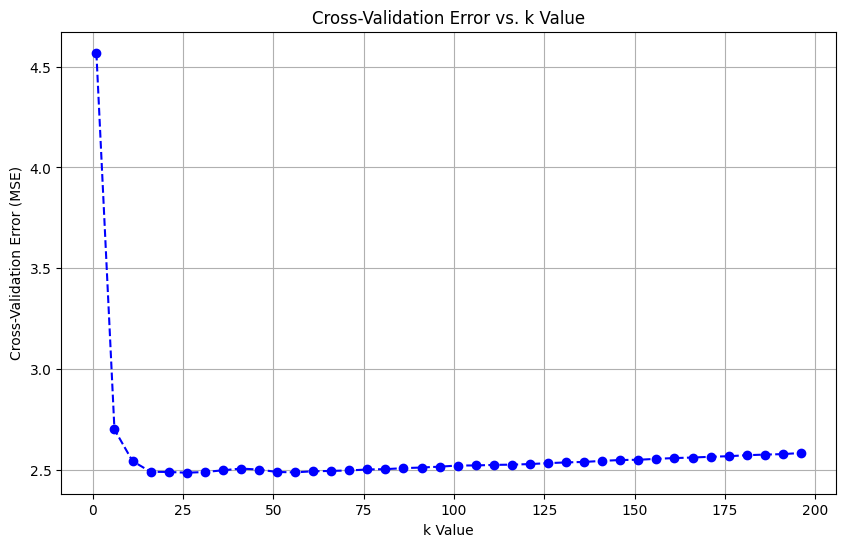

In [5]:
# Create a list of possible k values
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

n = 200

k_values = list(range(1, n, 5))

# Perform cross-validation for each k value
cv_scores = []
knn_model = None

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
    if knn_model == None or np.min(cv_scores) > -scores.mean():
        knn_model = knn
    cv_scores.append(-scores.mean())


# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores, marker='o', linestyle='dashed', color='blue')
# print(np.min(cv_scores))
# plt.plot(np.arange(1, n + 1), np.full((n, 1),(np.min(cv_scores))), color='red')
plt.grid(True)
plt.title('Cross-Validation Error vs. k Value')
plt.xlabel('k Value')
plt.ylabel('Cross-Validation Error (MSE)')
# plt.yticks(list(plt.yticks()[0]) + [np.min(cv_scores)])
plt.show()


In [6]:
knn_model.fit(x_train, y_train)
y_pred = knn_model.predict(x_test)

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 2.2323883586530644
R-squared: 0.5333726311975493
